# 1. Text Classification by Domain Using Sentence Embeddings

In [ ]:
This shows the outcomes here.

In [261]:
import os
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import hashlib

input_directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainsNew/"
output_directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainOutput/"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

file_names = [
    "Taylor_0_The Politics of Recognition.txt",
    "Kymlicka_0_The Politics of Multiculturalism chap 2.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt"
]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

domains = {
    "1.Cultural Expression - ": "This domain celebrates the diverse artistic, linguistic, and traditional practices of different cultural groups, underpinning the preservation of cultural identities.",
    "2.Ethical Diversity - ": "It underscores the coexistence of varying ethical beliefs within the framework of universal societal norms.",
    "3.Religious Freedom - ": "This facet emphasizes the ability to freely practice one’s religion, highlighting respect for diverse religious doctrines.",
    "4.Educational Equity - ": "It calls for equal educational opportunities reflecting the diverse backgrounds of students.",
    "5.Gender Equality - ": "This domain pushes for equal rights and opportunities for all genders, fostering non-discrimination and inclusivity.",
    "6.Political Inclusion - ": "It promotes the political involvement of minority groups to ensure their interests are represented and considered in governance."
}

def append_to_file(sentence, domain, file_name):
    output_file = os.path.join(output_directory, f"{domain} - {file_name}")

    with open(output_file, "a") as f:
        f.write(sentence + "\n")

def hash_domain(domain):
    return hashlib.sha1(domain.encode()).hexdigest()

def calculate_similarity(sentence, domain_text):
    sentence_embedding = model.encode([sentence])
    domain_embedding = model.encode([domain_text])
    return cosine_similarity(sentence_embedding, domain_embedding)

for file_name in file_names:
    file_path = os.path.join(input_directory, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    sentences = sent_tokenize(text)

    for sentence in sentences:
        max_similarity = -1
        max_domain = ""
        for domain, domain_text in domains.items():
            similarity = calculate_similarity(sentence, domain_text)
            if similarity > max_similarity:
                max_similarity = similarity
                max_domain = domain

        print(f"Sentence: {sentence}")
        print(f"Max Similarity Domain: {max_domain}")
        print("-" * 50)

        append_to_file(sentence, max_domain, file_name)

Sentence: https://ebookcentral-proquest-com.myaccess.library.utoronto.ca/lib/utoronto/reader.action?docID=816125&query=

✣
The Politics of Recognition
CHARLES TAYLOR
I
A NUMBER of strands in contemporary politics turn on the need, sometimes the demand, for recognition.
Max Similarity Domain: 6.Political Inclusion - 
--------------------------------------------------
Sentence: The need, it can be argued, is one of the driving forces behind nationalist movements in politics.
Max Similarity Domain: 6.Political Inclusion - 
--------------------------------------------------
Sentence: And the demand comes to the fore in a number of ways in today’s politics, on behalf of minority or “subaltern” groups, in some forms of feminism and in what is today called the politics of “multiculturalism.”
The demand for recognition in these latter cases is given urgency by the supposed links between recognition and identity, where this latter term designates something like a person’s understanding of who t

In [ ]:
Another difinitions for domains.

In [ ]:
domains = {
    "1.Cultural Expression - ": "celebrates diverse artistic, linguistic, and traditional practices",
    "2.Ethical Diversity - ": "underscores the coexistence of varying ethical beliefs",
    "3.Religious Freedom - ": "emphasizes the ability to freely practice one's religion",
    "4.Educational Equity - ": "calls for equal educational opportunities reflecting diverse backgrounds",
    "5.Gender Equality - ": "pushes for equal rights and opportunities for all genders",
    "6.Political Inclusion - ": "promotes the political involvement of minority groups"
}


In [ ]:
This saves each domains seperately in a file.

In [263]:
import os
from nltk.tokenize import sent_tokenize
from sentence_transformers import SentenceTransformer
import hashlib
from sklearn.metrics.pairwise import cosine_similarity  # Import if missing

input_directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainsNew/"
output_directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainOutput/"

if not os.path.exists(output_directory):
    os.makedirs(output_directory)

file_names = [
    "Taylor_0_The Politics of Recognition.txt",
    "Kymlicka_0_The Politics of Multiculturalism chap 2.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part1.txt",
    "1_THE_CONSTITUTION_ACTS_1867_to_1982_part2.txt"
]

model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

domains = {
    "1.Cultural Expression - ": "This domain celebrates the diverse artistic, linguistic, and traditional practices of different cultural groups, underpinning the preservation of cultural identities.",
    "2.Ethical Diversity - ": "It underscores the coexistence of varying ethical beliefs within the framework of universal societal norms.",
    "3.Religious Freedom - ": "This facet emphasizes the ability to freely practice one’s religion, highlighting respect for diverse religious doctrines.",
    "4.Educational Equity - ": "It calls for equal educational opportunities reflecting the diverse backgrounds of students.",
    "5.Gender Equality - ": "This domain pushes for equal rights and opportunities for all genders, fostering non-discrimination and inclusivity.",
    "6.Political Inclusion - ": "It promotes the political involvement of minority groups to ensure their interests are represented and considered in governance."
}

def append_to_file(sentence, domain, file_name):
    domain_file = hash_domain(domain) + ".txt"
    output_file = os.path.join(output_directory, domain_file)

    with open(output_file, "a") as f:
        f.write(file_name + " - " + sentence + "\n")

def hash_domain(domain):
    return hashlib.sha256(domain.encode()).hexdigest()  # Changed to sha256 for more uniqueness

def calculate_similarity(sentence, domain_description):
    # Fixed a potential issue by adding missing brackets
    sentence_embedding = model.encode([sentence])  
    domain_description_embedding = model.encode([domain_description])  
    similarity = cosine_similarity(sentence_embedding, domain_description_embedding)
    return similarity[0][0]  # This is the fix for your calculate_similarity function

for file_name in file_names:
    file_path = os.path.join(input_directory, file_name)
    with open(file_path, 'r', encoding='utf-8') as f:
        text = f.read()

    sentences = sent_tokenize(text)

    for sentence in sentences:
        domain_similarity_map = {}
        for domain, domain_description in domains.items():
            similarity = calculate_similarity(sentence, domain_description)
            domain_similarity_map[domain] = similarity

        max_domain = max(domain_similarity_map, key=domain_similarity_map.get)  # Get the domain with the highest similarity
        append_to_file(sentence, max_domain, file_name)

# 2. to calculate cosine similarity between a given sentence vector and multiple domain vectors

In [264]:
from sklearn.metrics.pairwise import cosine_similarity

# Assuming you have a sentence vector representation
sentence_vector = model.encode(["your_sentence"])

# Print the sentence vector
print("Sentence Vector:", sentence_vector)

# Calculate similarity to each domain
domain_similarities = {}

for domain, domain_text in domains.items():
    # Assuming model.encode([domain_text]) returns the domain vector
    domain_vector = model.encode([domain_text])

    # Print the domain vector
    print(f"{domain} Vector:", domain_vector)

    # Calculate cosine similarity
    similarity = cosine_similarity([sentence_vector.flatten()], [domain_vector.flatten()])[0][0]
    
    # Store the similarity in the dictionary
    domain_similarities[domain] = similarity
    print(f"Cosine Similarity with {domain}: {similarity}")

print("Domain Similarities:", domain_similarities)


Sentence Vector: [[ 0.49436745  0.6433355   0.5473858  -0.15867499  0.04430033  0.06545623
   0.7711096  -0.00502467  0.03115102  0.12921888  0.06213909 -0.2155014
   0.4016986  -0.06892417  0.65681607  0.17853908  0.08781079  0.10833506
  -0.5691201  -0.21641433 -0.00266953  0.26299888  0.19642814 -0.48162585
   0.03954384 -0.04732618  0.29996148 -0.20309779 -0.36402756  0.10387019
  -0.09416817  0.18003371  0.04596053 -0.02009275  0.12898365  0.4593718
   0.13932836  0.40743288  0.06298784 -0.3306145  -0.41007394 -0.42086467
  -0.29116756  0.21711197 -0.0569736  -0.2658046  -0.42840314 -0.02939889
  -0.43018112 -0.05065817 -1.1086901   0.04248838 -0.6917482   0.40240708
   0.41352472  0.2636373  -0.01786663 -0.36212632 -0.14289248  0.12050851
  -0.3763687  -0.07838346 -1.1216359   0.6985463  -0.14798963 -0.09287746
  -0.11401974  0.14447296 -0.8953533   0.78293836 -0.20161228  0.34729928
  -0.22462463  0.9580451  -0.00549761  0.03143943  0.08664645 -0.10342441
   0.25078568  0.108649

# 3. generating a single embedding representation for each domain from the constituent classified sentences

In [265]:
from sentence_transformers import SentenceTransformer
import pickle
import os

# Initialize transformer model
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')

# Define your embeddings directory
embeddings_directory = "/Users/mahdi/Library/CloudStorage/OneDrive-UniversityofToronto/DomainEmbeddings/"
if not os.path.exists(embeddings_directory):
    os.makedirs(embeddings_directory)

# Generate and save embeddings for each domain-specific file
for domain_name in domains:
    domain_sentences = []
    # For each file, read and encode the sentences corresponding to this domain
    for file_name in file_names:
        domain_file_path = os.path.join(output_directory, f"{domain_name} - {file_name}")
        if not os.path.isfile(domain_file_path):
            continue  # Skip if the file is not found
        with open(domain_file_path, 'r', encoding='utf-8') as domain_file:
            sentences = [line.strip() for line in domain_file.readlines()]
            domain_sentences.extend(sentences)
    
    if domain_sentences:
        embeddings = model.encode(domain_sentences)
        embeddings_filename = hashlib.sha1(domain_name.encode()).hexdigest() + ".embeddings"
        embeddings_file_path = os.path.join(embeddings_directory, embeddings_filename)
        with open(embeddings_file_path, 'wb') as emb_file:
            pickle.dump(embeddings, emb_file)

# 4. Loadpickle embeddings files for each domain

Apply PCA dimensionality reduction

Plot the reduced embeddings in 2D scatter plots

Generate individual PCA plots per domain

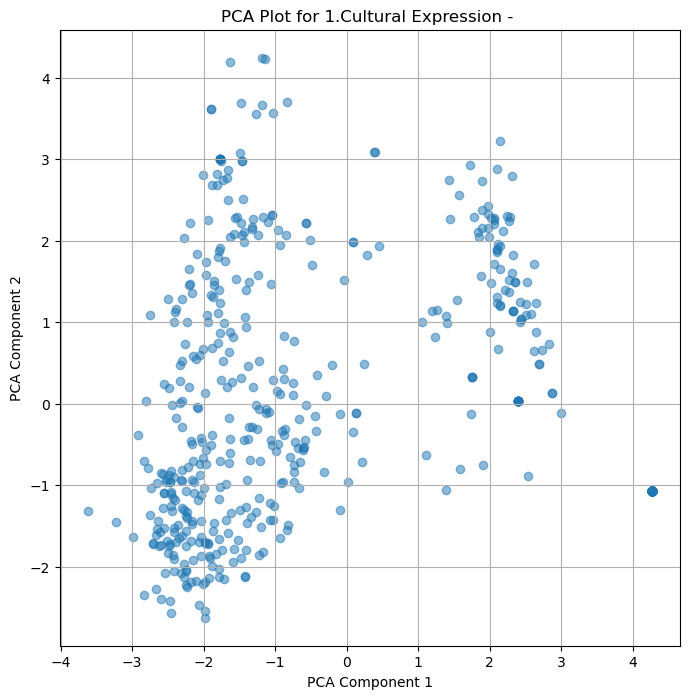

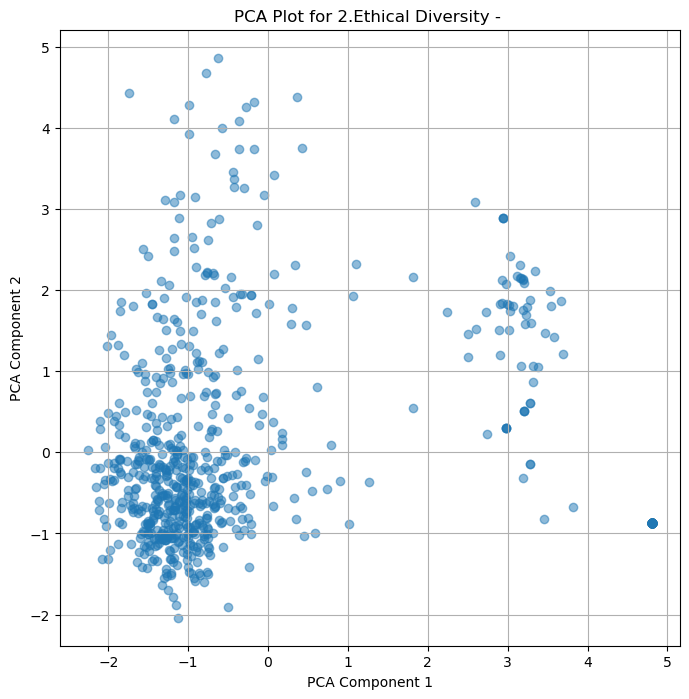

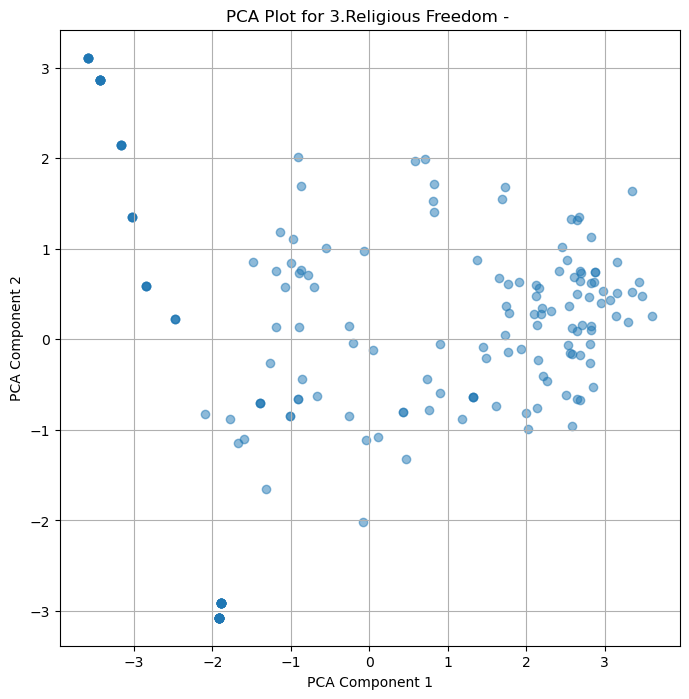

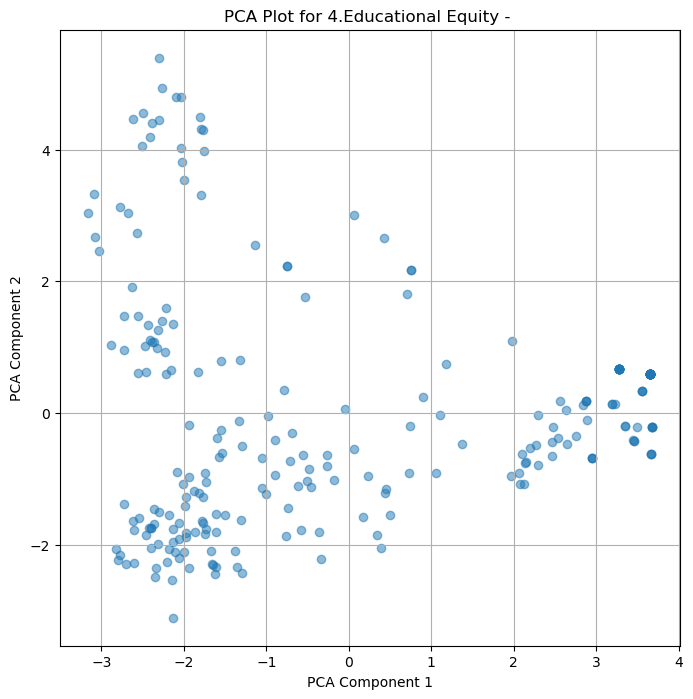

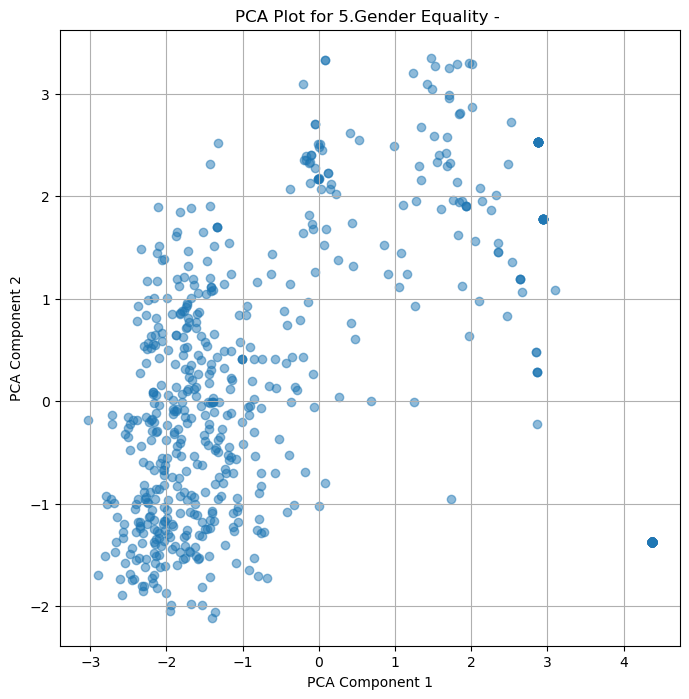

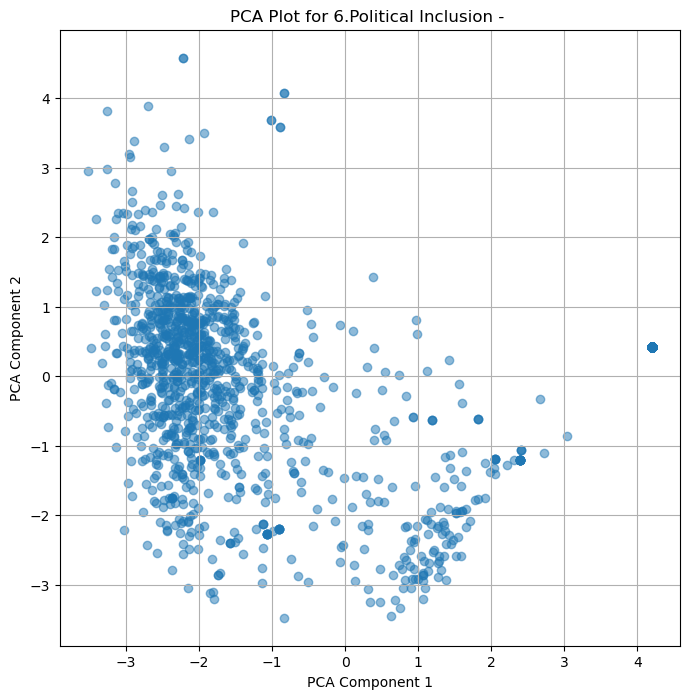

In [266]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import os

# Function to plot PCA
def plot_pca(embeddings, title):
    pca = PCA(n_components=2)
    embeddings_reduced = pca.fit_transform(embeddings)
    plt.figure(figsize=(8, 8))
    plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], alpha=0.5)
    plt.title(f"PCA Plot for {title}")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Generate PCA plots for each domain if embeddings exist
for domain_name in domains:
    embeddings_filename = hashlib.sha1(domain_name.encode()).hexdigest() + ".embeddings"
    embeddings_file_path = os.path.join(embeddings_directory, embeddings_filename)
    if not os.path.isfile(embeddings_file_path):
        print(f"No embeddings file found for {domain_name}, skipping PCA.")
        continue  # Skip if the embeddings file does not exist
    
    with open(embeddings_file_path, 'rb') as emb_file:
        embeddings = pickle.load(emb_file)
        
    if embeddings.size > 0:
        plot_pca(embeddings, domain_name)
    else:
        print(f"No embeddings found for {domain_name}, skipping PCA.")

In [ ]:
shows in different colors.

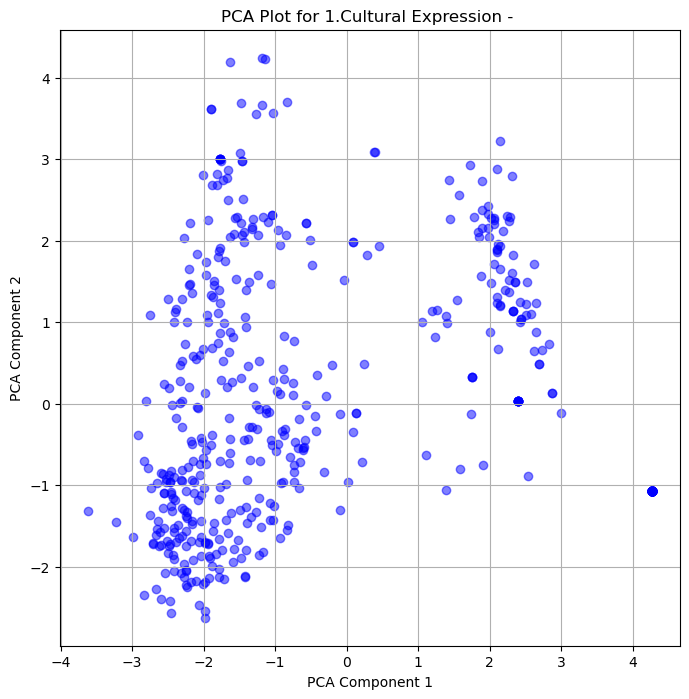

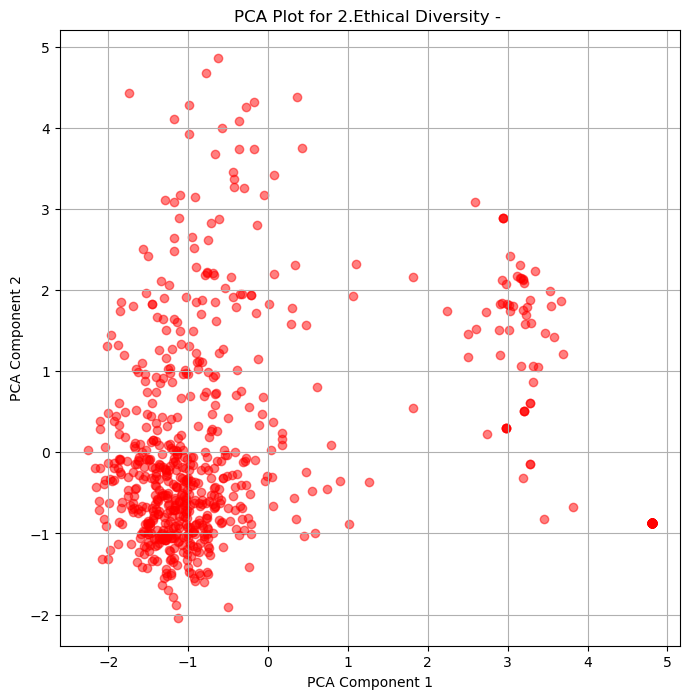

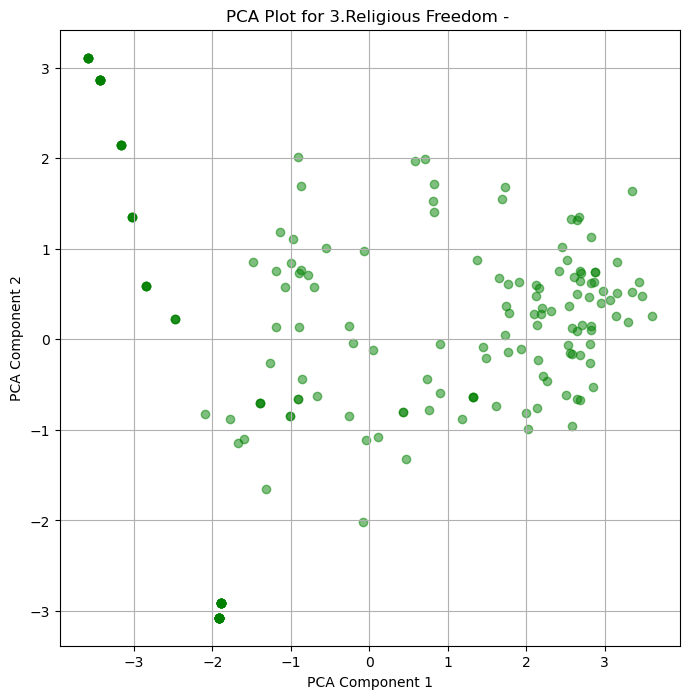

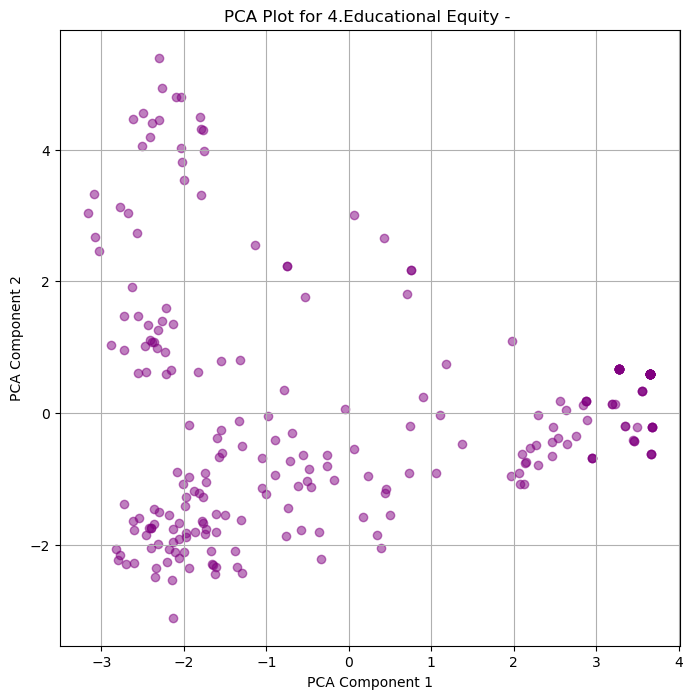

In [267]:
# Plot PCA with different colors for each domain
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pickle
import os

# Function to plot PCA with different colors for each domain
def plot_pca_with_colors(embeddings, title, color):
    pca = PCA(n_components=2)
    embeddings_reduced = pca.fit_transform(embeddings)
    plt.figure(figsize=(8, 8))
    plt.scatter(embeddings_reduced[:, 0], embeddings_reduced[:, 1], alpha=0.5, color=color)
    plt.title(f"PCA Plot for {title}")
    plt.xlabel('PCA Component 1')
    plt.ylabel('PCA Component 2')
    plt.grid(True)
    plt.show()

# Generate PCA plots for each domain with different colors if embeddings exist
for domain_name, color in zip(domains, ['blue', 'red', 'green', 'purple']):
    embeddings_filename = hashlib.sha1(domain_name.encode()).hexdigest() + ".embeddings"
    embeddings_file_path = os.path.join(embeddings_directory, embeddings_filename)
    
    if not os.path.isfile(embeddings_file_path):
        print(f"No embeddings file found for {domain_name}, skipping PCA.")
        continue  # Skip if the embeddings file does not exist
    
    with open(embeddings_file_path, 'rb') as emb_file:
        embeddings = pickle.load(emb_file)
        
    if embeddings.size > 0:
        plot_pca_with_colors(embeddings, domain_name, color)
    else:
        print(f"No embeddings found for {domain_name}, skipping PCA.")
